In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import librosa # pip install librosa==0.8.1
import librosa.display
import IPython.display as ipd

import tensorflow as tf
from tensorflow import keras

from pathlib import Path
from IPython.display import display, Audio

In [2]:
SAMPLING_RATE = 24000

In [3]:
SCALE = 0.5

BATCH_SIZE = 128
EPOCHS = 100

In [9]:
audios = pd.read_csv(r'C:\Users\stair\OneDrive\Documentos\speaker-recognition-dim0494\train.csv')
audios.head(10)

,id,file_path,transcription,speaker
0,3400,train/405_130895_000036_000002.wav,Here seals and otters could indulge in a sumpt...,35
1,5544,train/4788_94904_000003_000006.wav,That they should be willing and able to fulfil...,31
2,2061,train/4297_13009_000014_000002.wav,"When a man, perhaps through a long political l...",79
3,5393,train/1963_147036_000045_000003.wav,He walked to the door and unlocked it.,69
4,8795,train/7367_86737_000052_000003.wav,They returned to the hotel; at the door Franz ...,34
5,4695,train/8324_286682_000041_000002.wav,It is said that one of their sons has a white ...,51
6,10477,train/4680_16041_000027_000010.wav,"A situation so extreme, an obscurity so powerf...",50
7,10360,train/7190_90542_000072_000001.wav,The hollow was surrounded by perpendicular wal...,7
8,7571,train/5750_100289_000018_000003.wav,She has since taken up private practice and al...,24
9,3276,train/2843_152918_000006_000002.wav,"The sun showed as yet like a pat of butter, an...",36


In [5]:
audios['speaker'].value_counts()

0     302
74    285
89    272
7     260
11    242
     ... 
49     27
73     25
42     24
41     16
53     16
Name: speaker, Length: 84, dtype: int64

C:\Users\stair\miniconda3\envs\dim0494\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


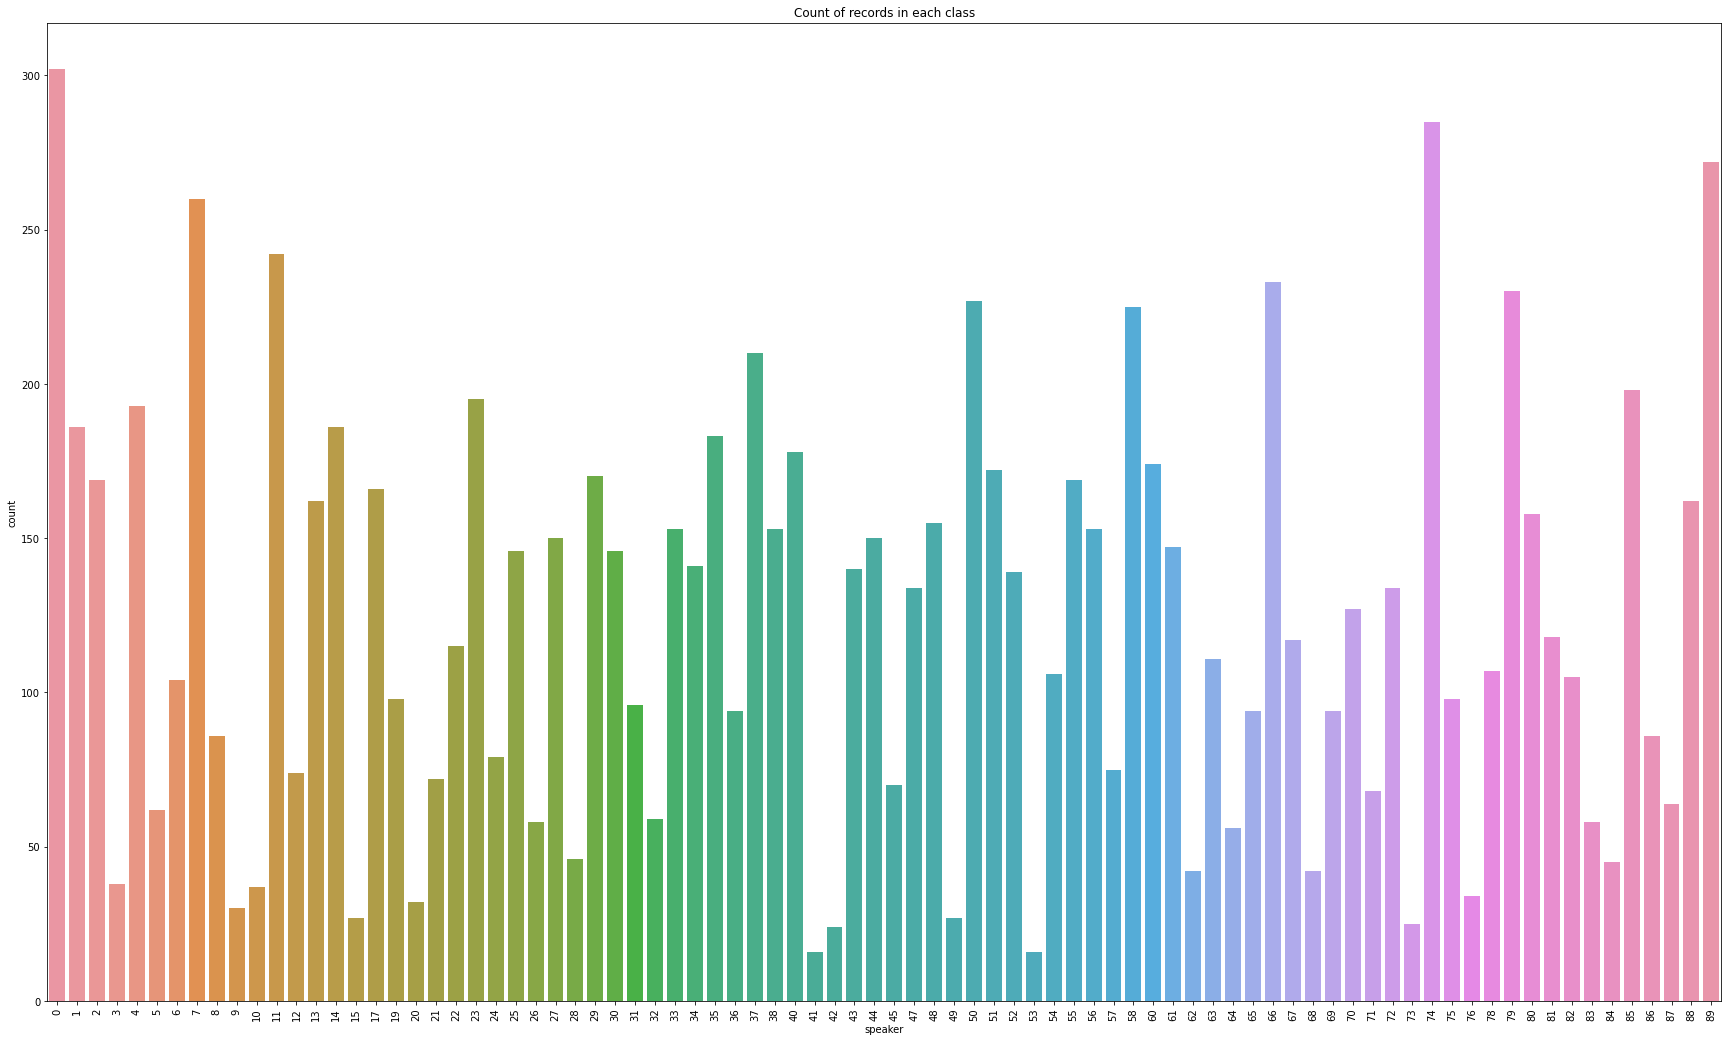

In [6]:
import seaborn as sns
plt.figure(figsize=(30, 18))
sns.countplot(audios['speaker'])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

In [7]:
def features_extractor(file):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [13]:
#Now we ned to extract the featured from all the audio files so we use tqdm
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(audios.iterrows()):
    file_name = os.path.join(os.path.abspath(r'C:\Users\stair\OneDrive\Documentos\speaker-recognition-dim0494'),str(row["file_path"]))
    final_class_labels=row["speaker"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

10380it [06:53, 25.08it/s]
